In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from tabulate import tabulate

# Install required libraries
!pip install -U portalocker>=2.0.0
!pip install tabulate

# Define data transformation
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load FashionMNIST dataset
train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

# Create data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# Labels mapping
labels_map = {
    0: "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
    5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"
}

# Display sample images
def display_sample_images():
    figure = plt.figure(figsize=(8, 8))
    cols, rows = 3, 3

    for i in range(1, cols * rows + 1):
        sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
        img, label = train_dataset[sample_idx]
        figure.add_subplot(rows, cols, i)
        plt.title(labels_map[label])
        plt.axis("off")
        plt.imshow(img.squeeze(), cmap="gray")
    plt.show()

# Model definition
class FashionMLP(nn.Module):
    def __init__(self, num_hidden_layers, hidden_layer_sizes):
        super(FashionMLP, self).__init__()
        layers = []
        layers.append(nn.Linear(28 * 28, hidden_layer_sizes[0]))  # Input layer
        for i in range(num_hidden_layers - 1):  # Hidden layers
            layers.append(nn.Linear(hidden_layer_sizes[i], hidden_layer_sizes[i + 1]))
        layers.append(nn.Linear(hidden_layer_sizes[-1], 10))  # Output layer
        self.layers = nn.ModuleList(layers)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        for layer in self.layers[:-1]:
            x = torch.sigmoid(layer(x))
        x = self.layers[-1](x)
        return x

# Define configurations
configurations = [
    {
        'name': "Configuration-1",
        'num_hidden_layers': 3,
        'hidden_layer_sizes': [32, 64, 128],
        'batch_size': 64,
        'learning_rate': 0.001,
        'optimizer': optim.Adam
    },
    {
        'name': "Configuration-2",
        'num_hidden_layers': 3,
        'hidden_layer_sizes': [64, 128, 256],
        'batch_size': 512,
        'learning_rate': 0.001,
        'optimizer': optim.RMSprop
    },
    {
        'name': "Configuration-3",
        'num_hidden_layers': 3,
        'hidden_layer_sizes': [128, 256, 512],
        'batch_size': 64,
        'learning_rate': 0.001,
        'optimizer': optim.Adam
    },
    {
        'name': "Configuration-4",
        'num_hidden_layers': 2,
        'hidden_layer_sizes': [64, 128],
        'batch_size': 64,
        'learning_rate': 0.001,
        'optimizer': optim.Adam
    },
    {
        'name': "Configuration-5",
        'num_hidden_layers': 2,
        'hidden_layer_sizes': [32, 64],
        'batch_size': 64,
        'learning_rate': 0.001,
        'optimizer': optim.Adam
    },
    {
        'name': "Configuration-6",
        'num_hidden_layers': 2,
        'hidden_layer_sizes': [128, 256],
        'batch_size': 64,
        'learning_rate': 0.001,
        'optimizer': optim.Adam
    },
    {
        'name': "Configuration-7",
        'num_hidden_layers': 2,
        'hidden_layer_sizes': [256, 512],
        'batch_size': 64,
        'learning_rate': 0.001,
        'optimizer': optim.RMSprop
    },
    {
        'name': "Configuration-8",
        'num_hidden_layers': 1,
        'hidden_layer_sizes': [64],
        'batch_size': 64,
        'learning_rate': 0.001,
        'optimizer': optim.Adam
    },
    {
        'name': "Configuration-9",
        'num_hidden_layers': 1,
        'hidden_layer_sizes': [128],
        'batch_size': 64,
        'learning_rate': 0.001,
        'optimizer': optim.Adam
    },
    {
        'name': "Configuration-10",
        'num_hidden_layers': 1,
        'hidden_layer_sizes': [256],
        'batch_size': 64,
        'learning_rate': 0.001,
        'optimizer': optim.Adam
    },
    {
        'name': "Configuration-11",
        'num_hidden_layers': 3,
        'hidden_layer_sizes': [32, 64, 128],
        'batch_size': 128,
        'learning_rate': 0.001,
        'optimizer': optim.RMSprop
    },
    {
        'name': "Configuration-12",
        'num_hidden_layers': 4,
        'hidden_layer_sizes': [64, 128, 256, 512],
        'batch_size': 128,
        'learning_rate': 0.001,
        'optimizer': optim.Adam
    },
    {
        'name': "Configuration-13",
        'num_hidden_layers': 2,
        'hidden_layer_sizes': [128, 256],
        'batch_size': 256,
        'learning_rate': 0.001,
        'optimizer': optim.RMSprop
    },
    {
        'name': "Configuration-14",
        'num_hidden_layers': 1,
        'hidden_layer_sizes': [512],
        'batch_size': 256,
        'learning_rate': 0.001,
        'optimizer': optim.Adam
    },
    {
        'name': "Configuration-15",
        'num_hidden_layers': 4,
        'hidden_layer_sizes': [64, 128, 256, 512],
        'batch_size': 32,
        'learning_rate': 0.001,
        'optimizer': optim.RMSprop
    }
]


# Running experiments
FC_results = []

for config in configurations:
    name = config['name']
    num_hidden_layers = config['num_hidden_layers']
    hidden_layer_sizes = config['hidden_layer_sizes']
    batch_size = config['batch_size']
    learning_rate = config['learning_rate']
    optimizer_func = config['optimizer']

    # Initialize model, loss function, and optimizer
    model = FashionMLP(num_hidden_layers, hidden_layer_sizes)
    criterion = nn.CrossEntropyLoss()
    optimizer = optimizer_func(model.parameters(), lr=learning_rate)

    # Display configuration
    print(f"Configuration - {name}")
    print("Input data:")
    print(f"- Num Hidden Layers: {num_hidden_layers}")
    print(f"- Hidden Layer Sizes: {hidden_layer_sizes}")
    print(f"- Batch Size: {batch_size}")
    print(f"- Learning Rate: {learning_rate}")

    # Training
    num_epochs = 25
    epoch_losses = []
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            # Print epoch-wise batch loss
            if i % 100 == 99:
                print(f'Epoch [{epoch + 1}], Batch [{i + 1}/{len(train_loader)}], Loss: {running_loss / 100:.4f}')
                running_loss = 0.0

        epoch_losses.append(running_loss)

    # Evaluating
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    print(f"Accuracy for {name}: {accuracy * 100:.2f}%\n")

    FC_results.append([name, num_hidden_layers, hidden_layer_sizes, batch_size, learning_rate, accuracy])

    # Print dotted line break
    print("." * 50)
    print()

# Display FC_results
print(tabulate(FC_results, headers=["Configuration", "Num Hidden Layers", "Hidden Layer Sizes", "Batch Size", "Learning Rate", "Accuracy"],
               floatfmt=".2f"))


Configuration - Configuration-1
Input data:
- Num Hidden Layers: 3
- Hidden Layer Sizes: [32, 64, 128]
- Batch Size: 64
- Learning Rate: 0.001
Epoch [1], Batch [100/938], Loss: 2.1994
Epoch [1], Batch [200/938], Loss: 1.6571
Epoch [1], Batch [300/938], Loss: 1.2642
Epoch [1], Batch [400/938], Loss: 1.0673
Epoch [1], Batch [500/938], Loss: 0.9412
Epoch [1], Batch [600/938], Loss: 0.8457
Epoch [1], Batch [700/938], Loss: 0.7610
Epoch [1], Batch [800/938], Loss: 0.7278
Epoch [1], Batch [900/938], Loss: 0.6943
Epoch [2], Batch [100/938], Loss: 0.6452


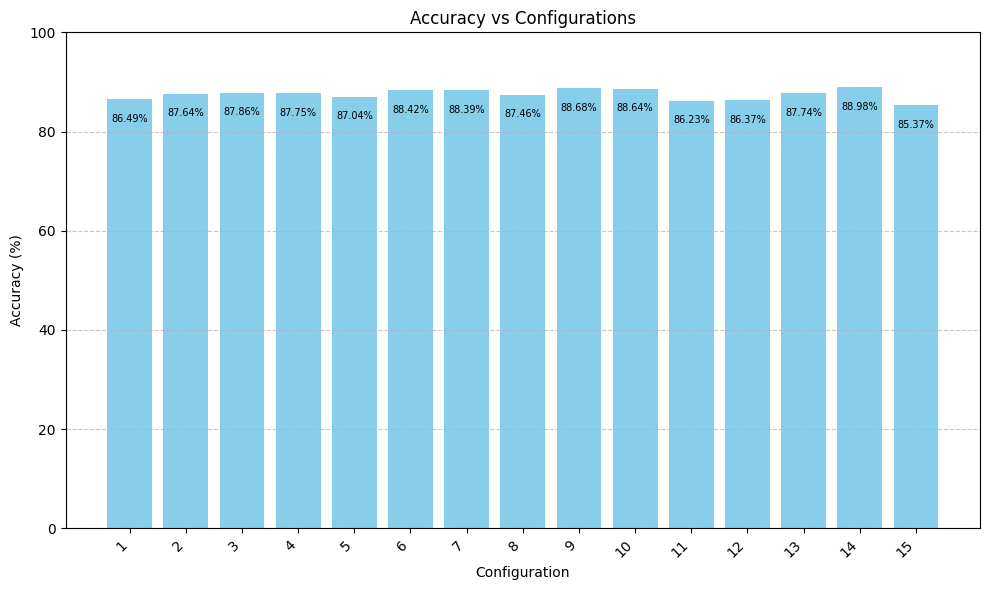

In [50]:
# Extract configurations and accuracies for plotting
configs = [result[0] for result in FC_results]
accuracies = [result[5] * 100 for result in FC_results]

# Plotting accuracy vs configurations
plt.figure(figsize=(10, 6))
bars = plt.bar(range(1, len(configs) + 1), accuracies, color='skyblue')
plt.xlabel('Configuration')
plt.ylabel('Accuracy (%)')  # Updated ylabel to show percentage
plt.title('Accuracy vs Configurations')
plt.xticks(range(1, len(configs) + 1), range(1, len(configs) + 1), rotation=45, ha='right')
plt.ylim(0, 100)  # Setting y-axis limit from 0 to 100 for percentage
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding text inside the bars
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 5, f'{accuracy:.2f}%',
             ha='center', va='bottom', color='black', fontsize=7)

plt.tight_layout()
plt.show()

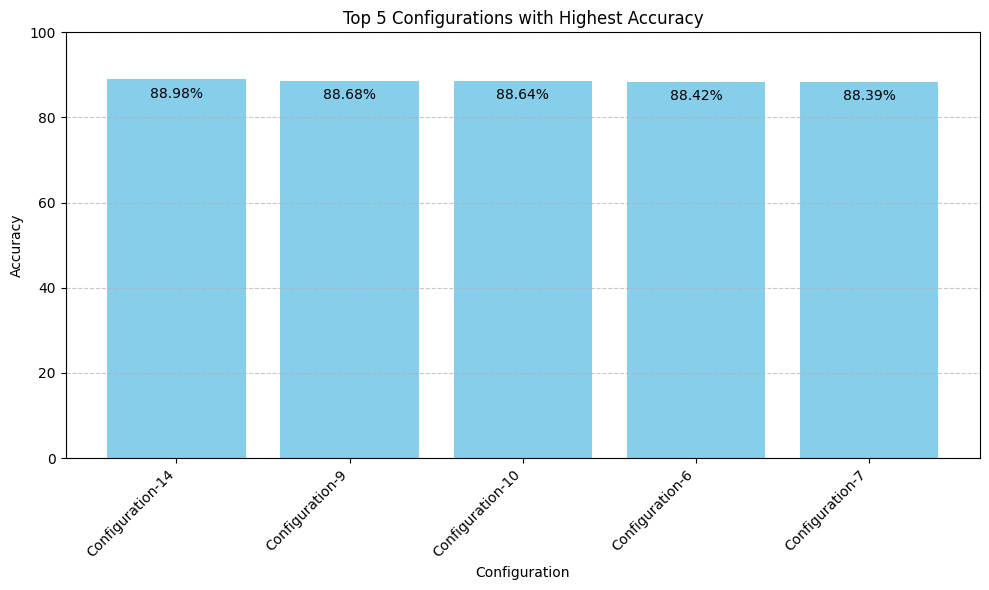

In [51]:
sorted_results = sorted(FC_results, key=lambda x: x[5], reverse=True)
top_5_results = sorted_results[:5]

# Extract configurations and accuracies for plotting
top_5_configs = [result[0] for result in top_5_results]
top_5_accuracies = [result[5] * 100 for result in top_5_results]

# Plotting top 5 accuracies
plt.figure(figsize=(10, 6))
bars = plt.bar(top_5_configs, top_5_accuracies, color='skyblue')
plt.xlabel('Configuration')
plt.ylabel('Accuracy')
plt.title('Top 5 Configurations with Highest Accuracy')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)  # Setting y-axis limit from 0 to 100 for percentage
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding text inside the bars
for bar, accuracy in zip(bars, top_5_accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 5, f'{accuracy:.2f}%',
             ha='center', va='bottom', color='black', fontsize=10)

plt.tight_layout()
plt.show()

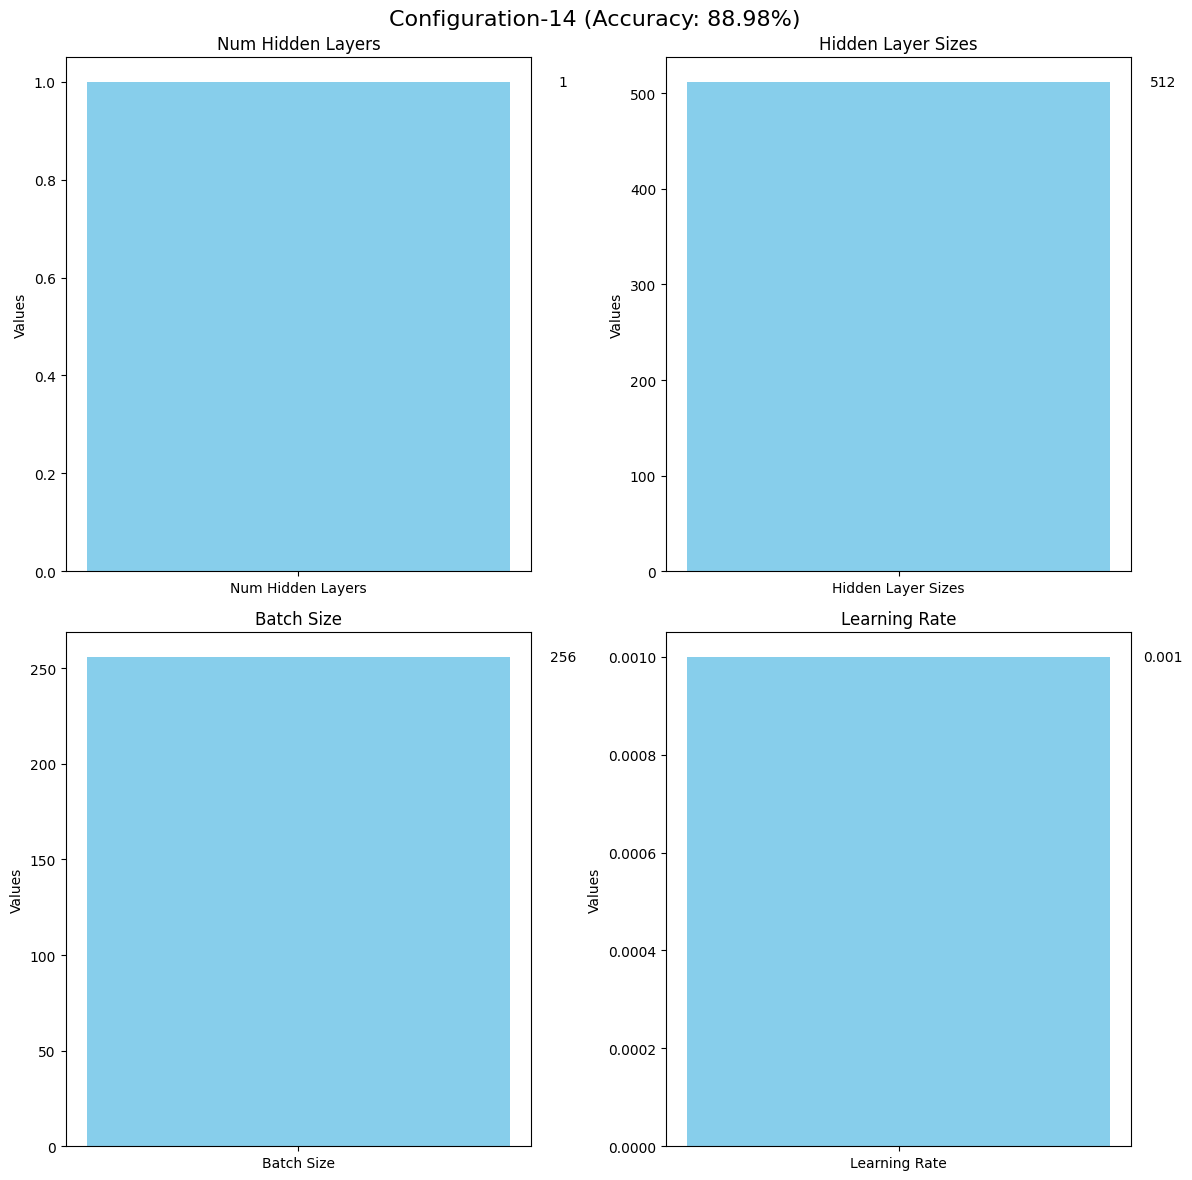

In [52]:
import matplotlib.pyplot as plt

# Extract the configuration with the highest accuracy
best_config = max(FC_results, key=lambda x: x[5])

# Extract configuration parameters
config_name = best_config[0]
num_layers = best_config[1]
layer_sizes = sum(best_config[2])
batch_size = best_config[3]
learning_rate = best_config[4]
accuracy = best_config[5] * 100

# Create a bar plot for the configuration parameters
labels = ['Num Hidden Layers', 'Hidden Layer Sizes', 'Batch Size', 'Learning Rate']
values = [num_layers, layer_sizes, batch_size, learning_rate]

# Plot each parameter separately
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
fig.suptitle(f"{config_name} (Accuracy: {accuracy:.2f}%)", fontsize=16)

for i, label in enumerate(labels):
    ax = axs[i//2][i%2]
    ax.bar(label, values[i], color='skyblue')
    ax.set_title(label)
    ax.set_ylabel('Values')

    # Annotate the bars with their corresponding values inside the bars
    ax.text(0.5, values[i], str(values[i]), color='black', va='center', ha='center')

plt.tight_layout()
plt.show()
